In [70]:
import arcpy
from arcpy import env
#env.workspace = "C:/Raster"
raster = arcpy.Raster("tm_24sep98")
print(raster.catalogPath)
desc = arcpy.da.Describe(raster)
print(desc["children"][0]["meanCellHeight"])
for rband in desc["children"]:
    print(rband["name"])

C:\Users\leiwang\Documents\ArcGIS\Projects\GEOG4057\GEOG4057.gdb\tm_24sep98
30.0
Band_1
Band_2
Band_3
Band_4
Band_5
Band_6
Band_7


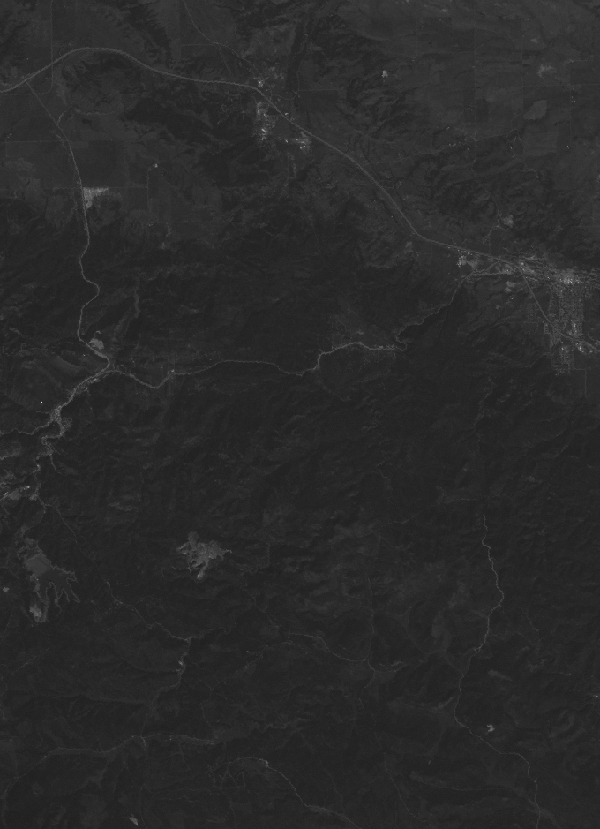

In [147]:
raster

In [146]:
for property in dir(raster):
    if "_" not in property:
        print(f"{property},\n")

RAT,

addDimension,

appendSlices,

bandCount,

bandNames,

bands,

blockSize,

catalogPath,

catalogPaths,

compressionType,

computeGSD,

computeHistograms,

computeStatistics,

exportImage,

extent,

format,

functions,

getBandProperty,

getColormap,

getDimensionAttributes,

getDimensionNames,

getDimensionValues,

getHistograms,

getProperty,

getRasterBands,

getRasterInfo,

getStatistics,

getVariableAttributes,

hasRAT,

hasTranspose,

height,

isConstant,

isEmpty,

isInteger,

isMultidimensional,

isTemporary,

maximum,

mdinfo,

mean,

meanCellHeight,

meanCellWidth,

median,

minimum,

name,

names,

noDataValue,

noDataValues,

path,

pixelType,

properties,

read,

readOnly,

removeVariables,

renameBand,

renameVariable,

save,

setBandProperty,

setColormap,

setHistograms,

setProperty,

setStatistics,

setVariableAttributes,

slices,

spatialReference,

standardDeviation,

uncompressedSize,

variableNames,

variables,

vectorize,

width,

write,



In [148]:
raster.height

939

In [154]:
r_information = raster.getRasterInfo()
print(dir(r_information))
newRaster = Raster(r_information)

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'fromJSONString', 'getBandCount', 'getBlockHeight', 'getBlockWidth', 'getCellSize', 'getExtent', 'getNoDataValues', 'getPixelType', 'getSpatialReference', 'setBandCount', 'setBlockHeight', 'setBlockWidth', 'setCellSize', 'setExtent', 'setNoDataValues', 'setPixelType', 'setSpatialReference', 'toJSONString']


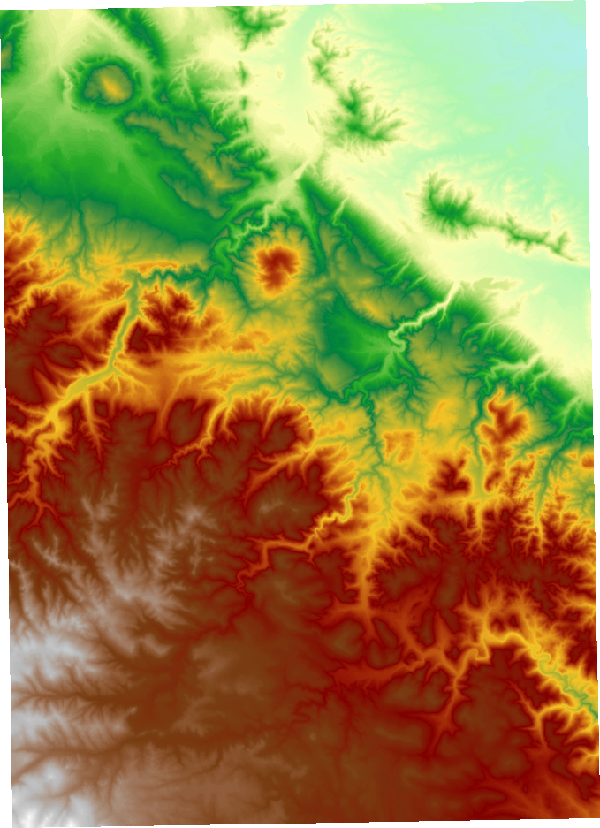

In [162]:
elev = Raster("topo30m")
Render (elev, colormap="Elevation #1")

In [82]:
raster = arcpy.Raster("tm_24sep98/Band_1")
print(raster.noDataValue)

None


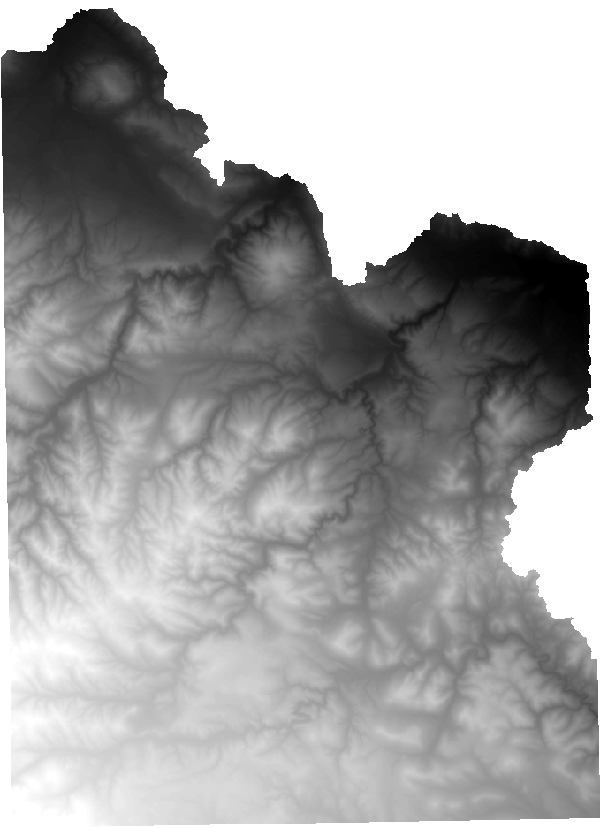

In [167]:
from arcpy.sa import *
from arcpy.ia import *
elev_clip = Clip(elev, "bh_wshds83")
elev_clip

In [96]:
import arcpy
from arcpy import env
rastername ="tm_24sep98"
bandcount = rdesc["bandCount"]
if bandcount == 1:
    print("Raster name: " + str(rdesc["baseName"]))
    print("No. rows: " + str(rdesc["height"]))
    print("No. columns: " + str(rdesc["width"]))
if bandcount > 1:
    counter = 1
    while counter <= bandcount:
        bandname = "Band_" + str(counter)
        band = arcpy.Raster(rastername + "/" + bandname)
        print(bandname)
        print("pixelType: " + band.pixelType)
        print("Height: " + str(band.height))
        print("Width: " + str(band.width))
        print("NoData Value: " + str(band.noDataValue))
        print("Spatial Reference: " + band.spatialReference.name)
        counter += 1

Band_1
pixelType: U8
Height: 939
Width: 680
NoData Value: None
Spatial Reference: NAD_1983_UTM_Zone_13N
Band_2
pixelType: U8
Height: 939
Width: 680
NoData Value: None
Spatial Reference: NAD_1983_UTM_Zone_13N
Band_3
pixelType: U8
Height: 939
Width: 680
NoData Value: None
Spatial Reference: NAD_1983_UTM_Zone_13N
Band_4
pixelType: U8
Height: 939
Width: 680
NoData Value: None
Spatial Reference: NAD_1983_UTM_Zone_13N
Band_5
pixelType: U8
Height: 939
Width: 680
NoData Value: None
Spatial Reference: NAD_1983_UTM_Zone_13N
Band_6
pixelType: U8
Height: 939
Width: 680
NoData Value: None
Spatial Reference: NAD_1983_UTM_Zone_13N
Band_7
pixelType: U8
Height: 939
Width: 680
NoData Value: None
Spatial Reference: NAD_1983_UTM_Zone_13N


In [131]:
from arcpy.sa import *
slopecon = Raster("Con_slope")

slopecon.readOnly = False
for i, j in vegras:
    if slopecon[i, j] == 1:
        slopecon[i, j] = 2
slopecon.save()

In [175]:
# This script calculates the maximum slope for the raster cells
import numpy as np
import arcpy
from arcpy.sa import Raster, RasterCellIterator

dem = Raster("topo30m")
arcpy.env.overwriteOutput = True
raster_info = dem.getRasterInfo()
cell_x = dem.meanCellWidth
cell_y = dem.meanCellHeight
raster_info.setPixelType("F32")
new_slope = Raster(raster_info)
with RasterCellIterator({'rasters':[dem,new_slope]}) as rci:
    for r, c in rci:
        slopes = []
        for x,y in [(-1,1),(-1,0),(-1,-1), (0,1),(0,-11),(1,-1),(1,1),(1,0)]:
            if dem[r,c] >= dem[r+x, c+y]:
                slope = abs(dem[r,c]- dem[r+x, c+y]) / np.sqrt((x*cell_x)**2 + (y*cell_y)**2)
                slopes.append(slope)
        if len(slopes) != 0:
            new_slope[r,c] = max(slopes)
new_slope.save('new_slope')

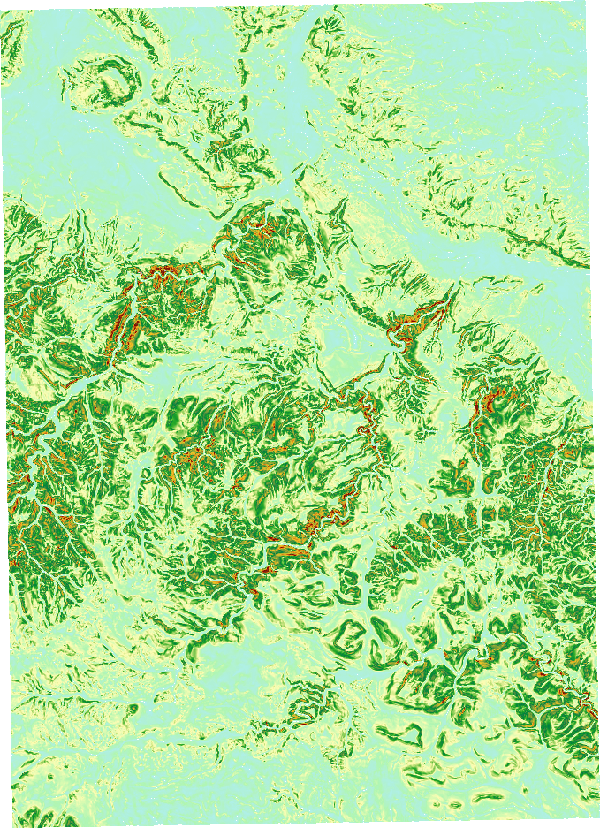

In [179]:
Render(new_slope,colormap="Elevation #1")

In [140]:
import arcpy
import numpy
raster = "tm_24spe98/Band_1"
array = arcpy.RasterToNumPyArray(raster)
print(array.min())
print(array.max())
print(array.mean())
print(array.std())

30
228
42.553447033765586
6.9893577218217064


In [143]:
import arcpy
raster = Raster("tm_24spe98/Band_1")
print(raster.minimum)
print(raster.maximum)
print(raster.mean)
print(raster.standardDeviation)

30.0
228.0
42.553447033765586
6.989363194920384


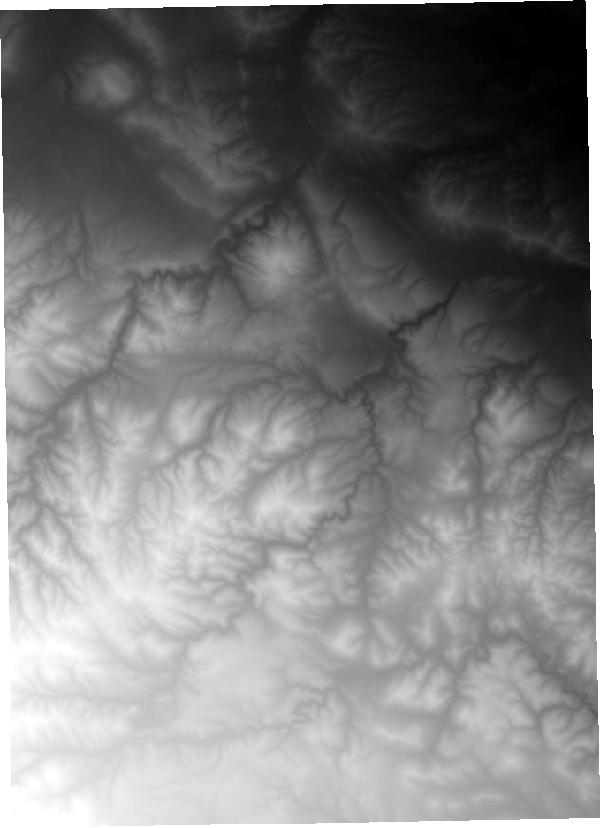

In [144]:
topo